In [93]:
#import necessary libraries - 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore') 
from sklearn.preprocessing import MinMaxScaler
import pickle 

In [94]:
# reading the csv file - 
df = pd.read_csv(r"C:\Users\lenovo\OneDrive\Files\movie_data.csv")

In [95]:
# Diplaying the top 5 rows 
df.head()

,id,title,genres,averageRating,numVotes,releaseYear
0,tt0903747,Breaking Bad,"Crime, Drama, Thriller",9.5,2227227,2008
1,tt5491994,Planet Earth II,Documentary,9.5,161480,2016
2,tt0185906,Band of Brothers,"Drama, History, War",9.4,543842,2001
3,tt0795176,Planet Earth,"Documentary, Family",9.4,222999,2006
4,tt5152226,Tree of Life,Drama,9.4,12151,2014


# Exploratory Data Analysis , Data Cleaning & Preprocessing

In [96]:
# Displaying the shape of the data - 
df.shape

(1000, 6)

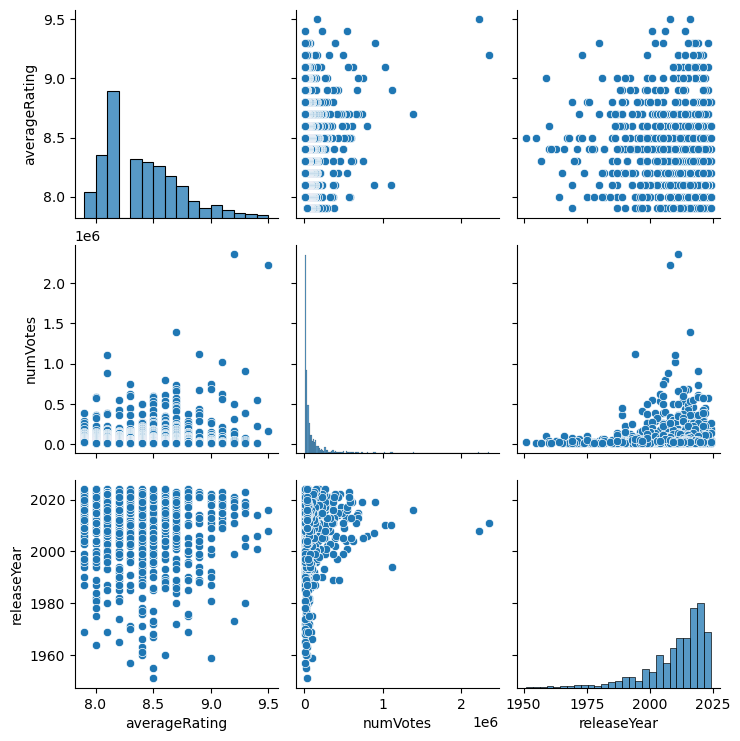

In [97]:
#plotting a pairplot - 
sns.pairplot(df)

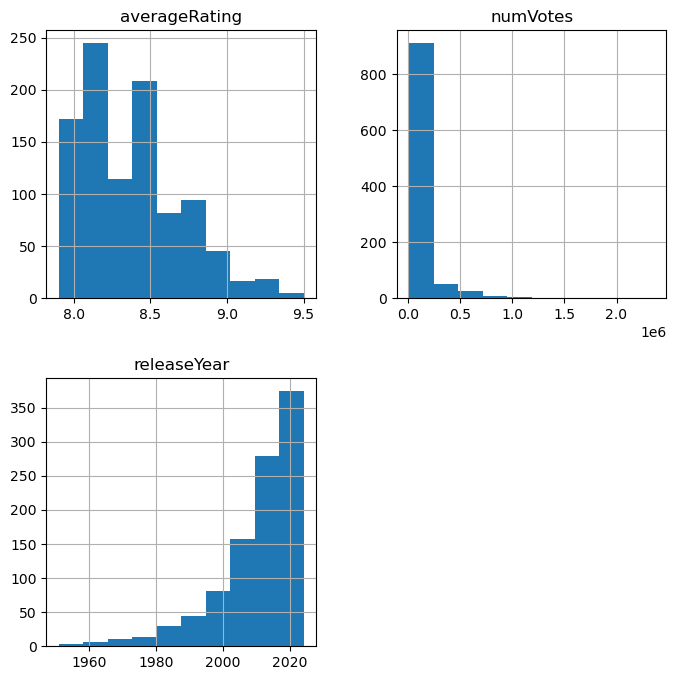

In [98]:
# Visualization of averageRating , numVotes and releaseYear to understand patterns- 
df.hist(figsize=(8,8));

Histogram 1: Average Rating

This histogram shows that most movies have an average rating between 8.0 and 8.5.
There is a peak around 8.25, indicating that this is the most common rating range.

Histogram 2: Number of Votes

This histogram shows that most movies have a relatively low number of votes, with the majority falling below 500,000.

Histogram 3: Release Year

This histogram shows a clear trend in the release year distribution.
There is a significant increase in movie releases from the 1990s onwards.

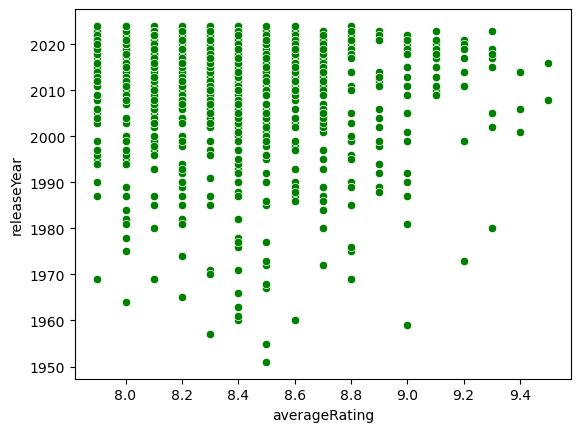

In [99]:
#Analyzing the relationship between releaseYear and averageRating to see trends over time- 
sns.scatterplot(x=df['averageRating'] , y=df['releaseYear'] , color='green');

This graph helps us understand how movie-making has changed over time. It also shows that while newer movies might be generally better, there are still great classic films to enjoy.

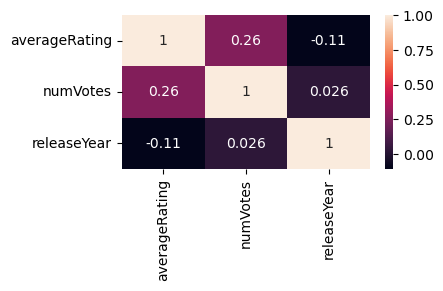

In [100]:
#Displaying the correlatiob b/w the numerical columns - 
plt.figure(figsize=(4,2))
numerical = df.select_dtypes(['int' , 'float'])
corr_matrix = numerical.corr()
sns.heatmap(corr_matrix,annot=True);

In summary, the correlation matrix reveals that there are only weak relationships between the three variables. The strongest relationship is the weak positive correlation between average rating and the number of votes, indicating that movies with higher ratings tend to have more votes.

In [101]:
df.head()

,id,title,genres,averageRating,numVotes,releaseYear
0,tt0903747,Breaking Bad,"Crime, Drama, Thriller",9.5,2227227,2008
1,tt5491994,Planet Earth II,Documentary,9.5,161480,2016
2,tt0185906,Band of Brothers,"Drama, History, War",9.4,543842,2001
3,tt0795176,Planet Earth,"Documentary, Family",9.4,222999,2006
4,tt5152226,Tree of Life,Drama,9.4,12151,2014


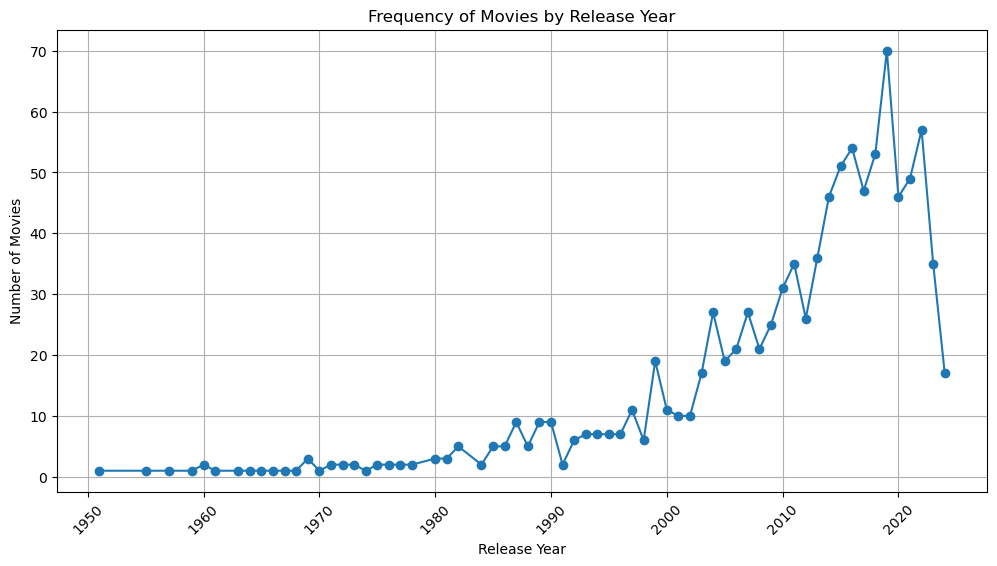

In [102]:
# Calculate the frequency of each release year
year_counts = df['releaseYear'].value_counts().sort_index()

# Extract x and y values for plotting
x = year_counts.index          
y = year_counts.values

# Plotting a line plot - 
plt.figure(figsize=(12,6))
plt.plot(x, y, marker='o')    
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.title("Frequency of Movies by Release Year")
plt.xticks(rotation=45)    
plt.grid(True)

The graph illustrates a significant increase in movie production over the past few decades, with a peak in the late 20th and early 21st centuries. While the recent trend shows a slight decline, the overall picture indicates a thriving film industry.

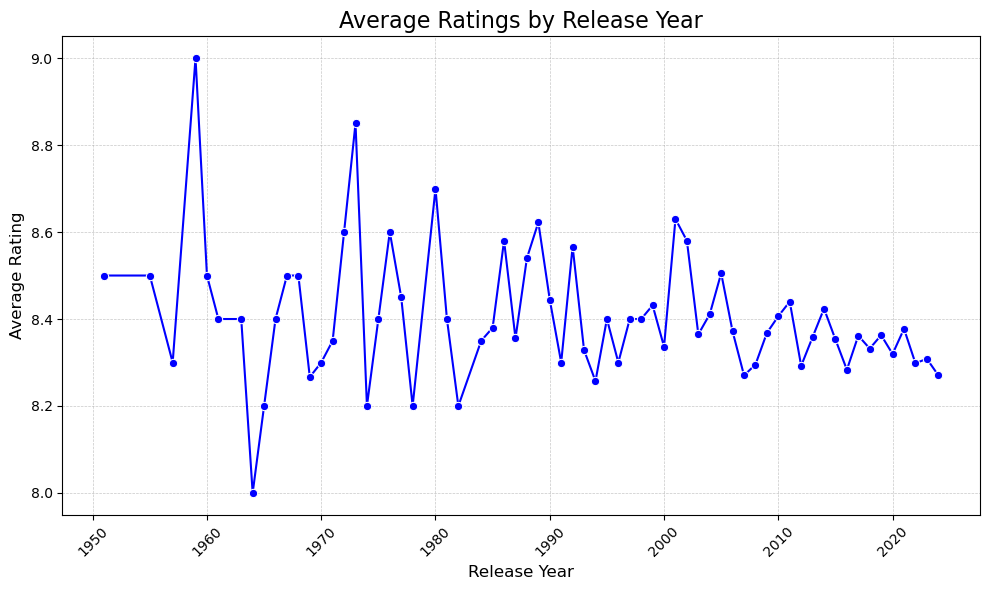

In [103]:
# Group data by release year and calculate the mean of average ratings
ratings_by_year = df.groupby('releaseYear')['averageRating'].mean().reset_index()

# Sort by release year to ensure the plot is chronological
ratings_by_year = ratings_by_year.sort_values('releaseYear')

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=ratings_by_year, x='releaseYear', y='averageRating', marker='o', color='blue')

# Customizing the plot
plt.title('Average Ratings by Release Year', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=45)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()

The line graph shows average movie ratings from 1950 to 2020. Ratings fluctuate over time, with peaks in the early 1960s and early 2000s, and troughs in the late 1960s and early 1980s. The most recent decade (2010-2020) shows a more stable pattern.

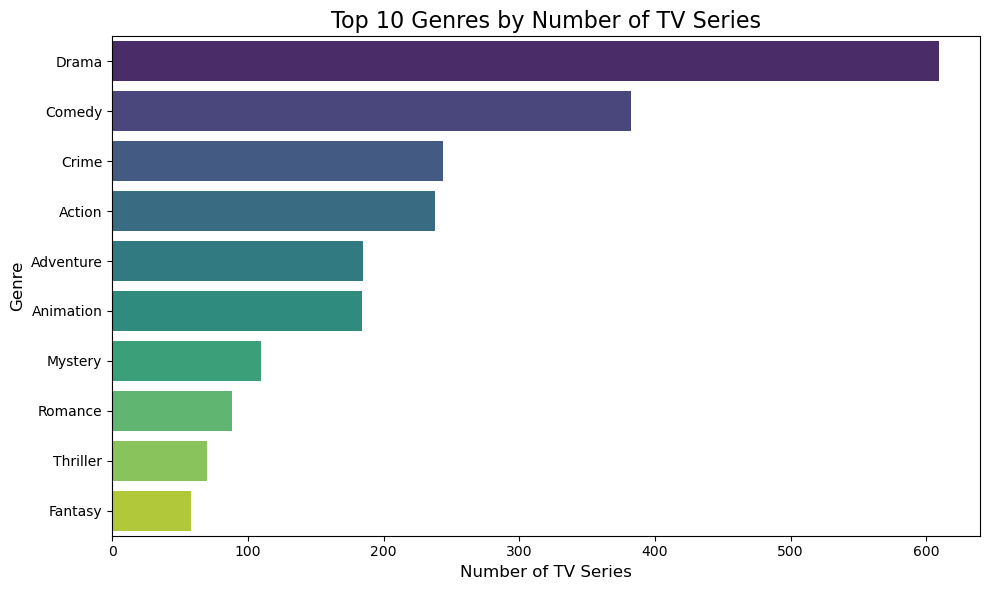

In [104]:
from collections import Counter
# Ensure all genre strings are consistent
df['genres'] = df['genres'].fillna('Unknown')  # Handle NaN values
df['genres'] = df['genres'].apply(lambda x: ','.join([genre.strip().title() for genre in x.split(',')]) if isinstance(x, str) else x)

# Flatten the list of genres and count occurrences
all_genres = []
for genres in df['genres']:
    if isinstance(genres, str):
        all_genres.extend(genres.split(','))
    elif isinstance(genres, list):
        all_genres.extend(genres)

# Count the occurrences of each genre
genre_counts = Counter(all_genres)

# Create a DataFrame for genre counts
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

# Plot top genres by count
plt.figure(figsize=(10, 6))
sns.barplot(data=genre_df.head(10), x='Count', y='Genre', palette='viridis')
plt.title('Top 10 Genres by Number of TV Series', fontsize=16)
plt.xlabel('Number of TV Series', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.tight_layout()
plt.show()

The chart shows the top 10 TV genres by popularity. Drama is the most popular with over 600 series, followed by Comedy. Genres like Crime, Action, and Adventure are also well-represented.

In [105]:
df.head()

,id,title,genres,averageRating,numVotes,releaseYear
0,tt0903747,Breaking Bad,"Crime,Drama,Thriller",9.5,2227227,2008
1,tt5491994,Planet Earth II,Documentary,9.5,161480,2016
2,tt0185906,Band of Brothers,"Drama,History,War",9.4,543842,2001
3,tt0795176,Planet Earth,"Documentary,Family",9.4,222999,2006
4,tt5152226,Tree of Life,Drama,9.4,12151,2014


The bar chart shows the top 10 TV genres by popularity on a streaming platform. Drama is the most popular with over 600 series, followed by Comedy. Genres like Crime, Action, and Adventure are also well-represented. Animation, Mystery, Romance, Thriller, and Fantasy have fewer series.

In [106]:

#Deriving additional features from existing data, such as the number of genres per movie - 
df['num_genres'] = df['genres'].apply(lambda x: len(x.split(',')))
print(df)

             id               title                      genres  \
0     tt0903747        Breaking Bad        Crime,Drama,Thriller   
1     tt5491994     Planet Earth II                 Documentary   
2     tt0185906    Band of Brothers           Drama,History,War   
3     tt0795176        Planet Earth          Documentary,Family   
4     tt5152226        Tree of Life                       Drama   
..          ...                 ...                         ...   
995   tt5368542        The Exorcist        Drama,Horror,Mystery   
996  tt14824792                 Ted                      Comedy   
997   tt2262532         The Fosters               Drama,Romance   
998   tt1985443  Hatfields & McCoys       Drama,History,Romance   
999   tt1528406          Fairy Tail  Action,Adventure,Animation   

     averageRating  numVotes  releaseYear  num_genres  
0              9.5   2227227         2008           3  
1              9.5    161480         2016           1  
2              9.4    54384

In [107]:
# Displaying the shape after adding a new colujmn 'num_genres' - 
df.shape

(1000, 7)

In [108]:
#Displaying the first 5 -
df.head()

,id,title,genres,averageRating,numVotes,releaseYear,num_genres
0,tt0903747,Breaking Bad,"Crime,Drama,Thriller",9.5,2227227,2008,3
1,tt5491994,Planet Earth II,Documentary,9.5,161480,2016,1
2,tt0185906,Band of Brothers,"Drama,History,War",9.4,543842,2001,3
3,tt0795176,Planet Earth,"Documentary,Family",9.4,222999,2006,2
4,tt5152226,Tree of Life,Drama,9.4,12151,2014,1


In [109]:
# Displaying the basic info about the data - 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   object 
 1   title          1000 non-null   object 
 2   genres         1000 non-null   object 
 3   averageRating  1000 non-null   float64
 4   numVotes       1000 non-null   int64  
 5   releaseYear    1000 non-null   int64  
 6   num_genres     1000 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


In [110]:
# Displaying the null values present in the data - 
df.isnull().sum()

id               0
title            0
genres           0
averageRating    0
numVotes         0
releaseYear      0
num_genres       0
dtype: int64

In [111]:
# Dropping unnecessary column ['id','title'] -
df.drop(['id','title'],axis=1,inplace=True)

In [112]:
# Displaying 5-point summary of the data - 
df.describe()

,averageRating,numVotes,releaseYear,num_genres
count,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,8.367300,9.209131e+04,2010.196000,2.491000
std,0.322063,1.735479e+05,12.325157,0.740586
min,7.900000,1.001700e+04,1951.000000,1.000000
25%,8.100000,1.788850e+04,2005.000000,2.000000
50%,8.300000,3.400900e+04,2014.000000,3.000000
75%,8.600000,9.086150e+04,2019.000000,3.000000
max,9.500000,2.360082e+06,2024.000000,3.000000


In [113]:
df.sample(15)

,genres,averageRating,numVotes,releaseYear,num_genres
533,"Comedy,Crime",8.3,25625,2021,2
971,"Action,Drama,Mystery",7.9,59403,2006,3
210,"Biography,Crime,Drama",8.6,42621,2022,3
888,"Comedy,Drama,Romance",8.0,22736,2020,3
475,"Comedy,Drama",8.3,190156,2007,2
855,"Drama,Mystery,Sci-Fi",8.0,66758,2016,3
991,"Comedy,Crime,Drama",7.9,34947,2009,3
663,"Crime,Drama,History",8.2,18128,2012,3
927,"Action,Fantasy,Horror",8.0,12364,2020,3
983,"Adventure,Animation,Comedy",7.9,43124,1969,3


In [114]:
# Displaying the value_counts present of 'genres' column -
count_ = df['genres'].value_counts().head(15).sort_values(ascending=False)
count_

genres
Action,Adventure,Animation    97
Comedy                        80
Crime,Drama,Mystery           70
Comedy,Drama                  55
Drama                         51
Crime,Drama,Thriller          33
Action,Crime,Drama            32
Comedy,Drama,Romance          31
Action,Adventure,Drama        29
Crime,Drama                   25
Drama,Romance                 21
Comedy,Crime,Drama            19
Animation,Comedy,Drama        14
Documentary                   13
Comedy,Drama,Fantasy          12
Name: count, dtype: int64

In [115]:
# Displaying the unique value present in the 'genres' column - 
unique_ = df['genres'].value_counts()
unique_

genres
Action,Adventure,Animation    97
Comedy                        80
Crime,Drama,Mystery           70
Comedy,Drama                  55
Drama                         51
                              ..
Animation,Drama,Mystery        1
Comedy,Horror                  1
Adventure,Sport,Talk-Show      1
Animation,Comedy,Talk-Show     1
Adventure,Drama,Horror         1
Name: count, Length: 185, dtype: int64

In [116]:
# Displaying the unique value present in the 'genres' column - 
unique_ = df['num_genres'].unique()
unique_

array([3, 1, 2], dtype=int64)

In [117]:
# Displaying the value_counts present in the 'genres' column - 
unique_ = df['num_genres'].value_counts()
unique_

num_genres
3    640
2    211
1    149
Name: count, dtype: int64

In [118]:
df.columns

Index(['genres', 'averageRating', 'numVotes', 'releaseYear', 'num_genres'], dtype='object')

# Outlier Detection and Handling 

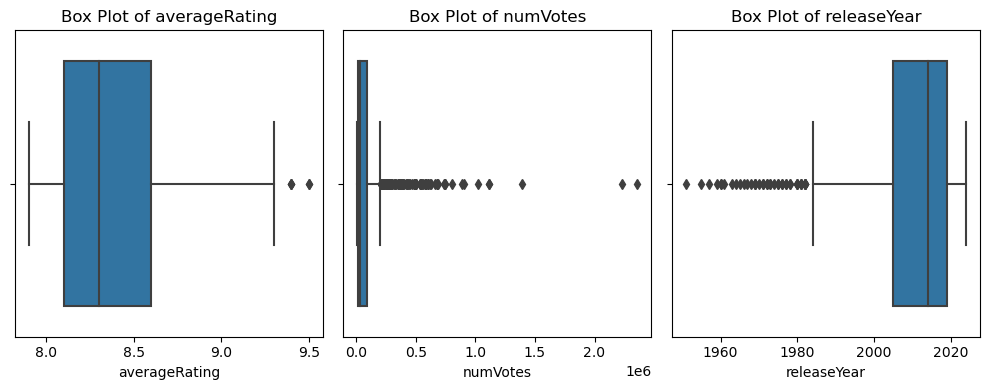

In [119]:
 #Plotting Distribution to see the outliers present in the data -

# Create a figure and axes (1 rows, 4 columns)
fig, axes = plt.subplots(1, 3, figsize=(10, 4))

# Flatten the axes for easier indexing
axes = axes.flatten()

# List of column names you want to plot
columns = df[['averageRating', 'numVotes', 'releaseYear']]


# Loop through each column and plot a boxplot in the respective subplot
for i, column in enumerate(columns):
    sns.boxplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')

# Adjust layout
plt.tight_layout()

In [120]:
# Handling the outliers using "capping"(IQR) because we have a small datset -

# Defining a function to cap outliers based on IQR
def cap_outliers(df, columns):
    df_capped = df.copy()
    
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Apply capping for the specific column
        df_capped[column] = np.where(df[column] < lower_bound, lower_bound,
                                     np.where(df[column] > upper_bound, upper_bound, df[column]))
    
    return df_capped

# Apply the function to cap outliers
columns = ['averageRating', 'numVotes', 'releaseYear']
df_c = cap_outliers(df, columns)


In [121]:
# Assigning df_c to df 
df_c = df

In [122]:
#Dispalying the column name - 
df.columns

Index(['genres', 'averageRating', 'numVotes', 'releaseYear', 'num_genres'], dtype='object')

In [123]:
# # Initialize LabelEncoder (perrforming Label encoding)
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()

# # Perform label encoding on the 'genre' column
# df['genre_'] = label_encoder.fit_transform(df['genres'])

In [124]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

# Sample data
# df['genres'] example: "Action, Comedy, Drama"
df['genres'] = df['genres'].str.split(', ')  # Step 1: Split by comma and space

# Initialize MultiLabelBinarizer and fit_transform the 'genres' column
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(df['genres'])

#Create a DataFrame with the encoded columns
genres_encoded_df = pd.DataFrame(genres_encoded, columns=mlb.classes_)

#Concatenate the new one-hot encoded columns to the original DataFrame
df = pd.concat([df, genres_encoded_df], axis=1)

# Drop the original 'genres' column if it’s no longer needed
df.drop('genres', axis=1, inplace=True)


In [125]:
# Defining numercal features 
numerical_features = ['numVotes', 'releaseYear','num_genres']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [126]:
# Displaying the data- 
df.sample(5)

,averageRating,numVotes,releaseYear,num_genres,Action,"Action,Adventure,Animation","Action,Adventure,Biography","Action,Adventure,Comedy","Action,Adventure,Drama","Action,Adventure,Fantasy",...,"Drama,Sci-Fi,Thriller","Drama,Sport","Drama,Thriller","Drama,War","Drama,Western","Fantasy,Mystery,Romance","Fantasy,War","Game-Show,Reality-Tv",Reality-Tv,Thriller
132,8.7,0.089625,0.958904,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
345,8.5,0.002455,0.904110,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
415,8.4,0.011282,0.863014,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9.3,0.016264,0.904110,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
635,8.2,0.006959,0.945205,0.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
df.shape

(1000, 189)

# Model Selection And Training 

In [128]:
# Defining x and y variable 
X = df.drop(['averageRating'], axis=1)
y = df['averageRating']

In [129]:
X.columns

Index(['numVotes', 'releaseYear', 'num_genres', 'Action',
       'Action,Adventure,Animation', 'Action,Adventure,Biography',
       'Action,Adventure,Comedy', 'Action,Adventure,Drama',
       'Action,Adventure,Fantasy', 'Action,Adventure,Sci-Fi',
       ...
       'Drama,Sci-Fi,Thriller', 'Drama,Sport', 'Drama,Thriller', 'Drama,War',
       'Drama,Western', 'Fantasy,Mystery,Romance', 'Fantasy,War',
       'Game-Show,Reality-Tv', 'Reality-Tv', 'Thriller'],
      dtype='object', length=188)

In [130]:
X.head()

,numVotes,releaseYear,num_genres,Action,"Action,Adventure,Animation","Action,Adventure,Biography","Action,Adventure,Comedy","Action,Adventure,Drama","Action,Adventure,Fantasy","Action,Adventure,Sci-Fi",...,"Drama,Sci-Fi,Thriller","Drama,Sport","Drama,Thriller","Drama,War","Drama,Western","Fantasy,Mystery,Romance","Fantasy,War","Game-Show,Reality-Tv",Reality-Tv,Thriller
0,0.943468,0.780822,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.064451,0.890411,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.227153,0.684932,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.090628,0.753425,0.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.000908,0.863014,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
# Splitting the data into train and test data - 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
# # installing xgboost 
# !pip install xgboost

In [133]:
#importing necessary libraries for model building 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error,mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb

In [134]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Decision Tree Regressor' : DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor' : RandomForestRegressor(n_estimators=100, random_state=42),
    'SVM Regressor' : SVR(kernel='rbf', C=1.0, epsilon=0.1),
    'XGB Regressor' : xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                          max_depth = 5, alpha = 10, n_estimators = 100)
}

# Evaluate models
best_model = None
best_score = float('inf')
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(f"Evaluation metrics for {model_name}")
    print(f"{model_name} - MAE:{mae}, RMSE:{rmse}, r2_score:{r2} , MSE:{mse}")
    print(" ")

    # Select best model based on RMSE
    if rmse < best_score:
        best_score = rmse
        best_model = model


print(f"Selected Model: {best_model}")

Evaluation metrics for Linear Regression
Linear Regression - MAE:319309616966.38477, RMSE:1883504833517.578, r2_score:-3.8653302693503498e+25 , MSE:3.5475904578840787e+24
 
Evaluation metrics for Gradient Boosting
Gradient Boosting - MAE:0.22402102974736546, RMSE:0.2731974284401137, r2_score:0.1867831966605814 , MSE:0.07463683490629103
 
Evaluation metrics for Decision Tree Regressor
Decision Tree Regressor - MAE:0.28600000000000014, RMSE:0.36945906403822343, r2_score:-0.4872561757904117 , MSE:0.1365000000000001
 
Evaluation metrics for Random Forest Regressor
Random Forest Regressor - MAE:0.23843999999999962, RMSE:0.29606681678296826, r2_score:0.04493572928669287 , MSE:0.08765555999999969
 
Evaluation metrics for SVM Regressor
SVM Regressor - MAE:0.21911160263208054, RMSE:0.27872068240661996, r2_score:0.15356907377485918 , MSE:0.0776852188012119
 
Evaluation metrics for XGB Regressor
XGB Regressor - MAE:0.2395712299346924, RMSE:0.29167603892795996, r2_score:0.0730535691728863 , MSE:0.

In [135]:
# evaluating metrics for training dataset-
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    mae = mean_absolute_error(y_train, y_train_pred)
    mse = mean_squared_error(y_train,y_train_pred)
    rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    r2 = r2_score(y_train, y_train_pred)
    print(f"Evaluation metrics for {model_name}")
    print(f"{model_name} - MAE:{mae}, RMSE:{rmse}, r2_score:{r2} , MSE:{mse}")
    print(" ")


Evaluation metrics for Linear Regression
Linear Regression - MAE:0.19186071777343752, RMSE:0.2554675950657114, r2_score:0.38736651377987563 , MSE:0.06526369212865829
 
Evaluation metrics for Gradient Boosting
Gradient Boosting - MAE:0.2063200074040868, RMSE:0.25676901734431734, r2_score:0.3811087675699385 , MSE:0.06593032826796634
 
Evaluation metrics for Decision Tree Regressor
Decision Tree Regressor - MAE:0.0, RMSE:0.0, r2_score:1.0 , MSE:0.0
 
Evaluation metrics for Random Forest Regressor
Random Forest Regressor - MAE:0.09262125000000081, RMSE:0.11727651619143517, r2_score:0.8708925793029652 , MSE:0.013753781249999954
 
Evaluation metrics for SVM Regressor
SVM Regressor - MAE:0.1952311429769329, RMSE:0.2584893071842156, r2_score:0.3727881467047863 , MSE:0.06681672192857578
 
Evaluation metrics for XGB Regressor
XGB Regressor - MAE:0.24661035871505735, RMSE:0.3106654465440935, r2_score:0.0940275399459678 , MSE:0.09651301967644103
 


# Deployment as a Web Application 

In [136]:
# Initializing my best model again- 
best_model = GradientBoostingRegressor()
best_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [137]:
# saving a pickle file 
# with open('best_model.pkl', 'wb') as file:  # no need to run it again the file is already in the system 
#     pickle.dump(best_model, file)

In [138]:
# TO Deploy this model on local host use command - 

# For Ananconda Prompt - streamlit run streamlit.py 
# For VS cose - streamlit run .\streamlit.py 